In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [2]:
sfwtab = pd.read_csv(r'sfw_T_0-0c2_U_0-7_nu_eq_3', index_col=0)


In [77]:
sfwtab_1 = pd.read_csv(r'sfw_50T_0-0c2_U_1_nu_eq_3', index_col=0)

# #sfwtab = pd.concat((sfwtab_5,sfwtab_6, sfwtab_7), ignore_index=True)
#sfwtab=sfwtab


In [ ]:
sfwtab.head()

,U,T,mu,nu,sq_det_SFW,convsfw,SFW_ten,SFWxx,SFWxy,delta0,delta1,ns0,ns1,deltaError,nError
0,1,0.000000,(-0.4999346672094144-9.673994610784305e-34j),(2.999170409048141+3.240431147622179e-34j),(0.18678313236141197+1.09118914608055e-18j),(0.02095073685742607-4.648817143343348e-50j),[[1.86783132e-01+1.09118915e-18j 6.16643059e-1...,(0.1867831323614124+1.0911891460805506e-18j),(6.166430587365402e-18-1.0557677189469712e-33j),(0.05014633403209323-3.2269633347033507e-34j),(0.27507307944026527-3.3156184305349907e-34j),(1.0001298018929434+2.024887529791181e-34j),(0.9995203035775988+6.077718089154987e-35j),7.166665e-08,0.000112
1,1,0.004082,(-0.49993466720942203-8.721519689763605e-34j),(2.999170409048239-1.7009769573842963e-33j),NaN,NaN,[[nan+nanj nan+nanj]\n [nan+nanj nan+nanj]],NaN,NaN,(0.050146334028231966-6.802742175339645e-34j),(0.2750730794401189-6.310309364348406e-33j),(1.0001298018929097-2.507351344006112e-34j),(0.9995203035776646-7.2512091149184255e-34j),7.166665e-08,0.000112
2,1,0.008163,(-0.4999346674229026-8.28563229892554e-34j),(2.9991704117161695-5.474620804360874e-34j),(0.1867831256537803+1.0911891194173316e-18j),(0.020950732270804413-8.011142207287803e-51j),[[ 1.86783126e-01+1.09118912e-18j -1.53825052e...,(0.18678312565377986+1.091189119417335e-18j),(-1.538250517802732e-17+1.2509374735441457e-33j),(0.050146234335488774+1.9426602051404463e-34j),(0.2750730756673274+1.2931221934459736e-33j),(1.0001298009877053-3.1026632294233702e-34j),(0.9995203053642321-1.185978787468752e-34j),7.166512e-08,0.000112
3,1,0.012245,(-0.49993467295363425-7.3478445955036975e-34j),(2.9991704807225315-3.203037433962739e-33j),(0.1867835841374615+1.0911928811192802e-18j),(0.02095174510372299-5.605484600355532e-50j),[[ 1.86783584e-01+1.09119288e-18j -9.24352671e...,(0.186783584137462+1.0911928811192838e-18j),(-9.243526712278587e-18-1.3068486716986908e-33j),(0.050143387992837504-3.442582434153539e-34j),(0.2750729680241029-2.067182093071494e-33j),(1.0001297762703478-1.4944591071118514e-34j),(0.9995203522260919-1.5267957616257771e-33j),7.163231e-08,0.000112
4,1,0.016327,(-0.4999346831935859-4.124529752187305e-34j),(2.9991706051483105+7.502141847308449e-34j),(0.18678951031980734+1.0912367885977219e-18j),(0.0209695014944256+3.0545439677161596e-51j),[[ 1.86789510e-01+1.09123679e-18j -7.21818933e...,(0.1867895103198083+1.0912367885977369e-18j),(-7.218189330013673e-18+3.493894067127939e-33j),(0.05013031825159535-3.106041587223175e-33j),(0.275072453883457-2.3381766453687313e-32j),(1.0001296930744004+1.1919802152980432e-33j),(0.999520456036955-2.2088301528359914e-34j),7.153993e-08,0.000112
5,1,0.020408,(-0.4999346287669869+1.1635866705233116e-34j),(2.9991699019841698-2.440923728886188e-33j),(0.18679416136532118+1.0912762435062853e-18j),(0.021043651435281856+1.2542507193767726e-50j),[[1.86794161e-01+1.09127624e-18j 1.51154799e-1...,(0.18679416136531982+1.0912762435062703e-18j),(1.5115479896630514e-18+8.884728951538471e-33j),(0.0501019355713227-6.872948724129903e-34j),(0.275070698782864-5.5846947697820965e-33j),(1.000129666180213+1.2040702017946591e-34j),(0.9995201179019784-1.2806653745328269e-33j),7.154503e-08,0.000112
6,1,0.024490,(-0.4999343644538793-6.272767085756538e-34j),(2.999166527372621+1.7895407933366596e-33j),(0.18673748655175124+1.0909029119180019e-18j),(0.021197708032139023+6.760216202136452e-50j),[[ 1.86737487e-01+1.09090291e-18j 8.24550081e...,(0.18673748655175143+1.0909029119180077e-18j),(8.245500806690731e-19-3.505985326409698e-33j),(0.050057579317184665-5.967674158752242e-34j),(0.27506278491696345-2.578916896657359e-32j),(1.0001299864018072+3.935867956642934e-34j),(0.9995182704854069+6.9797699883618305e-34j),7.200236e-08,0.000112
7,1,0.028571,(-0.49993374341138375-2.4996920407161327e-33j),(2.9991586177002207+1.324493872400838e-32j),(0.1865053893458533+1.0893530905067656e-18j),(0.021410478244506776-4.320718039546191e-50j),[[1.86505389e-01+1.08935309e-18j 2.28862032e-1...,(0.18650538934585392+1.089353090506767e-18j),(2.2886203183138864e-17+8.6513

In [5]:
s1 = len(sfwtab['U'].unique())
s2 = len(sfwtab['T'].unique())

In [13]:
Tarr = np.zeros((s1,s2))
sfwarr = np.zeros((s1,s2))
csfwarr = np.zeros((s1,s2))
for i,Uv in enumerate(sfwtab.U.unique()):
    Tarr[i]=np.array(sfwtab['T'].loc[sfwtab.U==Uv])
    sfwarr[i]=np.array(sfwtab.sq_det_SFW.loc[sfwtab.U==Uv], dtype=complex)
    csfwarr[i] = np.array(sfwtab.convsfw.loc[sfwtab.U==Uv], dtype=complex)
    

C:\Users\atsch\AppData\Local\Temp\ipykernel_16952\1949909337.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  sfwarr[i]=np.array(sfwtab.sq_det_SFW.loc[sfwtab.U==Uv], dtype=complex)
C:\Users\atsch\AppData\Local\Temp\ipykernel_16952\1949909337.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  csfwarr[i] = np.array(sfwtab.convsfw.loc[sfwtab.U==Uv], dtype=complex)


In [7]:
T_Bkt = []
for i,Uv in enumerate(sfwtab.U.unique()):
   
    T_Bkt.append(np.array(sfwtab['T'].loc[np.abs(np.array(sfwtab.sq_det_SFW, dtype=complex)-(sfwtab['T'])*8/np.pi)<1e-2].loc[sfwtab.U==Uv]))

In [80]:
U = np.array(sfwtab_1.U)
if 'T' in sfwtab.columns:
    T = np.array(sfwtab_1['T'])
mu=np.array(sfwtab_1.mu, dtype=complex)
nu = np.array(sfwtab_1.nu, dtype=complex)
sdsfw = np.array(sfwtab_1.sq_det_SFW, dtype=complex)
convsfw = np.array(sfwtab_1.convsfw, dtype=complex)
sfwxx = np.array(sfwtab_1.SFWxx, dtype=complex)


In [9]:
Tbkt = [i[0] for i in T_Bkt]

In [10]:
len(Tbkt)

16

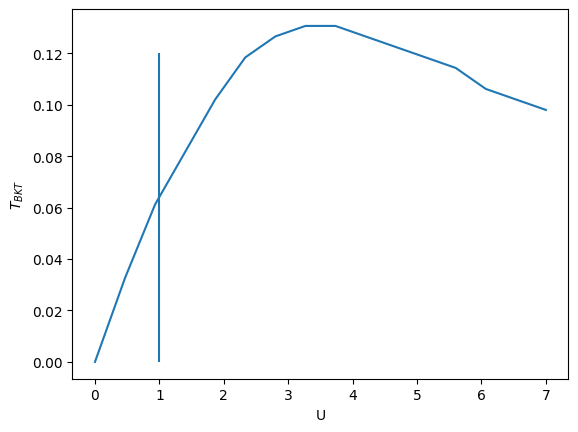

In [11]:
plt.xlabel('U')
plt.ylabel(r'$T_{BKT}$')
plt.plot(sfwtab.U.unique(),Tbkt)
plt.vlines(1,0,0.12)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


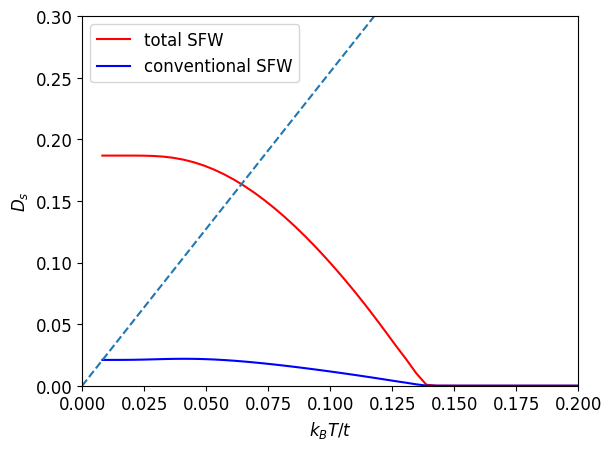

In [91]:
#U dependence of sfw for fixed T
plt.xlabel(r'$k_B T/t$', size='large')
plt.ylabel(r'$D_{s}$', size='large')
plt.xticks(size='large')
plt.yticks(size='large')
plt.ylim(0,0.3)
plt.xlim(0,0.2)
plt.plot(T, sdsfw, c='red', label='total SFW')
plt.plot(T, convsfw,c='blue', label='conventional SFW')
plt.plot(T, T*8/np.pi, linestyle='--')

plt.legend(fontsize='large')
#plt.colorbar(label=r'$\nu$')

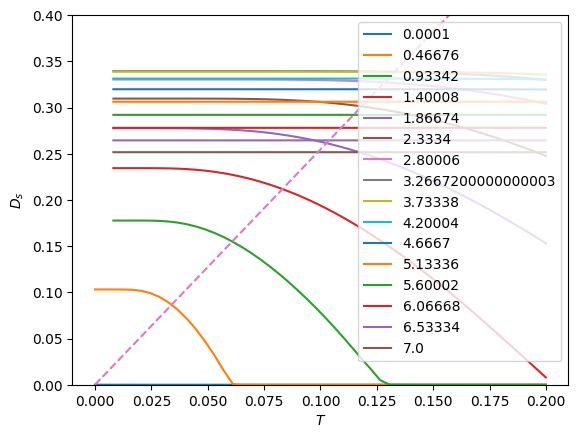

In [14]:
#Temperature dependence of sfw for fixed U

plt.xlabel(r'$T$')
plt.ylabel(r'$D_{s}}$')
plt.ylim(0,0.4)
#plt.xlim(0,15)
for i in range(s1)[:]:
    plt.plot(Tarr[i], sfwarr[i], label = sfwtab.U.unique()[i])
    #plt.plot(Tarr[i], csfwarr[i], label = sfwtab.U.unique()[i])
plt.plot(Tarr[0], Tarr[0]*8/np.pi, linestyle='--')
#plt.vlines(0.06, 0, 0.2)
plt.legend()

In [15]:
0.2/200

0.001

In [87]:
Tarr_fine = np.linspace(0,0.2,200)
yarr = np.zeros((s1,200))

for i in range(s1):
    yarr[i] = np.interp(Tarr_fine, Tarr[i], sfwarr[i])

yarr_1 = np.interp(Tarr_fine, T, sdsfw)


In [89]:
np.where(np.abs(yarr_1-Tarr_fine*8/np.pi)<0.0011)

(array([64], dtype=int64),)

In [90]:
Tarr_fine[64]

0.06432160804020101

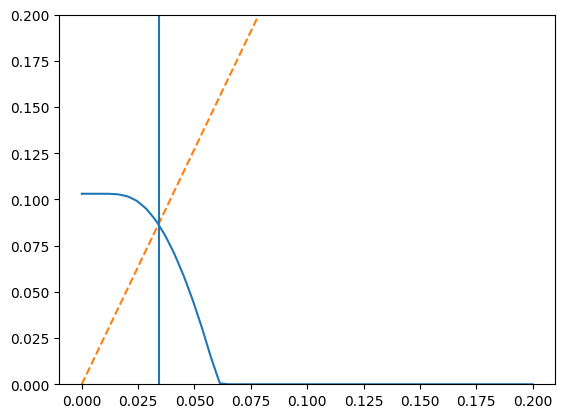

In [40]:
plt.ylim(0,0.2)
plt.plot(Tarr_fine, yarr[1])
plt.plot(Tarr[0], Tarr[0]*8/np.pi, linestyle='--')
plt.vlines(0.0341, 0, 0.3)


In [55]:
T_bkt = []
for i in range(s1):
    T_bkt.append(list([Tarr_fine[np.abs(Tarr_fine*8/np.pi-yarr[i])<0.002]][0])[0])# for y in yarr[1]]

In [56]:
T_bkt

[0.0,
 0.034170854271356785,
 0.061306532663316586,
 0.08341708542713569,
 0.10251256281407037,
 0.11859296482412061,
 0.12864321608040202,
 0.13266331658291458,
 0.13266331658291458,
 0.12964824120603016,
 0.1256281407035176,
 0.11959798994974875,
 0.11457286432160806,
 0.1085427135678392,
 0.10351758793969851,
 0.0984924623115578]

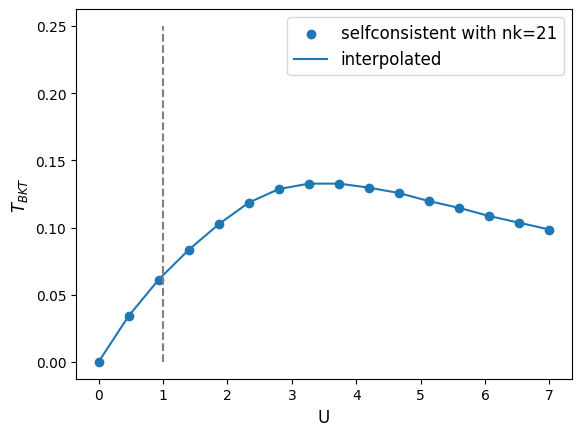

In [95]:
plt.xlabel('U', size='large')
plt.ylabel(r'$T_{BKT}$', size='large')
plt.scatter(sfwtab.U.unique(),T_bkt, label='selfconsistent with nk=21')
plt.plot(Uarr_fine, Tbkt_fine, label='interpolated')
plt.vlines(1,0,0.25, linestyle='dashed', colors='gray')
plt.legend(fontsize='large')


In [61]:
Uarr_fine = np.linspace(0,7,100)
Tbkt_fine = np.interp(Uarr_fine, sfwtab.U.unique(),T_bkt)

In [72]:
np.where(np.abs(Uarr_fine-1)<0.011)

(array([14], dtype=int64),)

In [73]:
Tbkt_fine[14]

0.06398253164803527

In [70]:
np.abs(Uarr_fine-1)

array([1.        , 0.92929293, 0.85858586, 0.78787879, 0.71717172,
       0.64646465, 0.57575758, 0.50505051, 0.43434343, 0.36363636,
       0.29292929, 0.22222222, 0.15151515, 0.08080808, 0.01010101,
       0.06060606, 0.13131313, 0.2020202 , 0.27272727, 0.34343434,
       0.41414141, 0.48484848, 0.55555556, 0.62626263, 0.6969697 ,
       0.76767677, 0.83838384, 0.90909091, 0.97979798, 1.05050505,
       1.12121212, 1.19191919, 1.26262626, 1.33333333, 1.4040404 ,
       1.47474747, 1.54545455, 1.61616162, 1.68686869, 1.75757576,
       1.82828283, 1.8989899 , 1.96969697, 2.04040404, 2.11111111,
       2.18181818, 2.25252525, 2.32323232, 2.39393939, 2.46464646,
       2.53535354, 2.60606061, 2.67676768, 2.74747475, 2.81818182,
       2.88888889, 2.95959596, 3.03030303, 3.1010101 , 3.17171717,
       3.24242424, 3.31313131, 3.38383838, 3.45454545, 3.52525253,
       3.5959596 , 3.66666667, 3.73737374, 3.80808081, 3.87878788,
       3.94949495, 4.02020202, 4.09090909, 4.16161616, 4.23232

In [ ]:
sfwtab['T'].loc[(np.abs(complex(sfwtab.sq_det_SFW)-sfwtab['T']*8/np.pi)<1e-3)]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

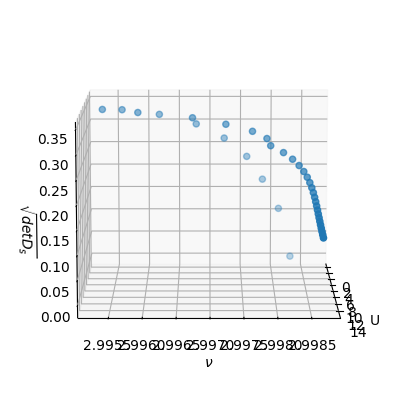

In [36]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()